In [125]:
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import numpy as np

### Create tables for the database

In [126]:

conn = sqlite3.connect('ApexLegendGlobalSeries.db') 
c = conn.cursor()

c.execute('''
          CREATE TABLE GroupGame1 ('Team' TEXT PRIMARY KEY, 'Total' INT,'1' INT, 
          'A' INT, '2' INT, 'B' INT, '3' INT, C INT, 
          '4' INT, 'D' INT, '5' INT, 'E' INT, '6' INT, F INT)
          ''')
c.execute('''
          CREATE TABLE GroupGame2 ('Team' TEXT PRIMARY KEY, 'Total' INT, '7' INT, 
          'G' INT, '8' INT, 'H' INT, '9' INT, I INT, 
          '10' INT, 'J' INT, '11' INT, 'K' INT, '12' INT, L INT)
          ''')
c.execute('''
          CREATE TABLE GroupGame3 ('Team' TEXT PRIMARY KEY, 'Total' INT, '13' INT, 
          'M' INT, '14' INT, 'N' INT, '15' INT, O INT, 
          '16' INT, 'P' INT, '17' INT, 'Q' INT, '18' INT, R6_K INT)
          ''')
conn.commit()



In [131]:
g1 = pd.read_csv('csv/GroupGame1.csv', low_memory=False)
g2 = pd.read_csv('csv/GroupGame2.csv', low_memory=False)
g3 = pd.read_csv('csv/GroupGame3.csv', low_memory=False)

In [132]:
g1.to_sql('GroupGame1',conn,if_exists='replace',index=False)
conn.commit()
g2.to_sql('GroupGame2',conn,if_exists='replace',index=False)
conn.commit()
g3.to_sql('GroupGame3',conn,if_exists='replace',index=False)
conn.commit()

In [133]:
g1 = pd.merge(g1, g2, on='Team')
g1 = pd.merge(g1, g3, on='Team')
g1 = g1.drop('Total_x', axis=1)
g1 = g1.drop('Total_y', axis=1)
g1 = g1.drop('Total', axis=1)
g1.head()

,Team,1,A,2,B,3,C,4,D,5,...,14,N,15,O,16,P,17,Q,18,R
0,XSET,1,16,1,14,12,0,6,7,13,...,3,6,18,0,17,3,17,0,4,3
1,JLE,13,1,15,3,5,9,4,7,1,...,12,0,19,2,8,4,19,0,14,3
2,MST,4,4,5,2,2,6,9,2,19,...,6,1,10,3,7,0,7,1,2,9
3,NTH,14,2,13,3,1,11,10,3,4,...,1,12,19,0,8,2,12,1,5,7
4,SSG,8,7,3,6,9,4,13,0,3,...,10,3,17,0,14,0,2,4,9,4


In [134]:
# transpose for Tableau

g1T_points = (g1.iloc[:,1:][g1.columns[1::2]]).T
g1T_points.columns = g1['Team']

g1T_points.insert(0,"Value", [*range(1,19)], True)

g1T_points.index
g1.iloc[:,1:][g1.columns[1::2]]

g1T_points.head()

Team,Value,XSET,JLE,MST,NTH,SSG,E36,FCD,TSM,100T,...,ONIC,GHS,ESA,SNG,FUN,KCP,ACE,GO,K1CK,VXD
1,1,1,13,4,14,8,15,18,2,3,...,11,9,13,10,15,20,3,17,4,14
2,2,1,15,5,13,3,4,14,16,7,...,12,1,2,5,6,20,15,14,9,18
3,3,12,5,2,1,9,4,7,17,19,...,2,14,10,19,18,20,16,17,6,13
4,4,6,4,9,10,13,2,11,12,5,...,12,17,11,6,10,9,4,15,19,14
5,5,13,1,19,4,3,6,14,11,10,...,3,13,12,14,10,9,16,4,18,19


In [7]:
## Export for tableau
g1T_points.to_csv('combinedgroupstageT.csv', index=True)

### Max, Mean, Median of Group Stage

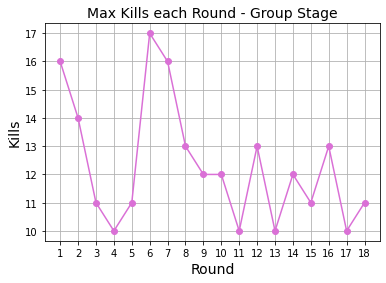

In [92]:
# max kills from each round

g1max = g1.iloc[:,0:][g1.columns[::2]].max()
y = g1max[1:]

x = [*range(1,19)]
plt.plot(x, y, color='orchid', marker='o')
plt.title('Max Kills each Round - Group Stage', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.savefig('MeanKills.png', bbox_inches='tight')
plt.show()

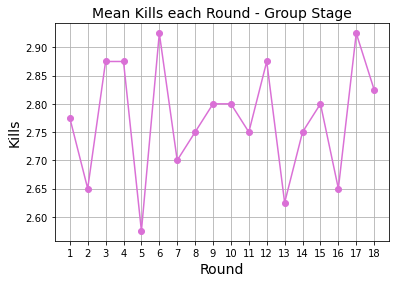

In [90]:
# average kills from each round

y = g1.iloc[:,0:][g1.columns[::2]].mean()

x = [*range(1,19)]
plt.plot(x, y, color='orchid', marker='o')
plt.title('Mean Kills each Round - Group Stage', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('MeanKills.png', bbox_inches='tight')
plt.show()

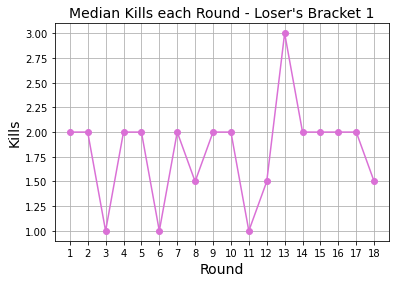

In [93]:
# median kills for group games

y = g1.iloc[:,0:][g1.columns[::2]].median()

x = [*range(1,19)]
plt.plot(x, y, color='orchid', marker='o')
plt.title('Median Kills each Round - Loser\'s Bracket 1', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('MeanKills.png', bbox_inches='tight')
plt.show()

### Import Bracket Stage Files

In [136]:
l1 = pd.read_csv('csv/Losersbracket1.csv', low_memory=False)
w1 = pd.read_csv('csv/Winnersbracket.csv', low_memory=False)
l2 = pd.read_csv('csv/Losersbracket2.csv', low_memory=False)

### Create tables for the database

In [137]:
c.execute('''
          CREATE TABLE LosersBracket1 ('Team' TEXT PRIMARY KEY, 'Total' INT, '1' INT, 
          'A' INT, '2' INT, 'B' INT, '3' INT, C INT, 
          '4' INT, 'D' INT, '5' INT, 'E' INT, '6' INT, F INT)
          ''')
c.execute('''
          CREATE TABLE WinnersBracket ('Team' TEXT PRIMARY KEY,'Total' INT, '1' INT, 
          'A' INT, '2' INT, 'B' INT, '3' INT, C INT, 
          '4' INT, 'D' INT, '5' INT, 'E' INT, '6' INT, F INT)
          ''')
c.execute('''
          CREATE TABLE LosersBracket2 ('Team' TEXT PRIMARY KEY,'Total' INT, '1' INT, 
          'A' INT, '2' INT, 'B' INT, '3' INT, C INT, 
          '4' INT, 'D' INT, '5' INT, 'E' INT, '6' INT, F INT)
          ''')
conn.commit()

In [138]:
l1.to_sql('LosersBracket1',conn,if_exists='replace',index=False)
conn.commit()
w1.to_sql('WinnersBracket',conn,if_exists='replace',index=False)
conn.commit()
l2.to_sql('LosersBracket2',conn,if_exists='replace',index=False)
conn.commit()

In [139]:
l1 = l1.drop('Total', axis=1)
w1 = w1.drop('Total', axis=1)
l2 = l2.drop('Total', axis=1)

### Max / Average / Median for Loser's Bracket 1

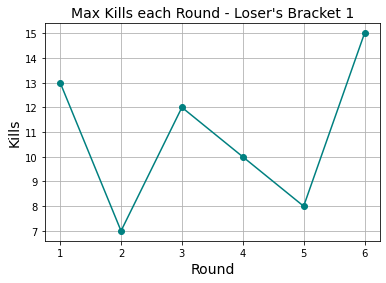

In [66]:
# max kills for loser's bracket 1

l1max = l1.iloc[:,0:][l1.columns[::2]].max()
y = l1max[1:]

x = [*range(1,7)]
plt.plot(x, y, color='teal', marker='o')
plt.title('Max Kills each Round - Loser\'s Bracket 1', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()

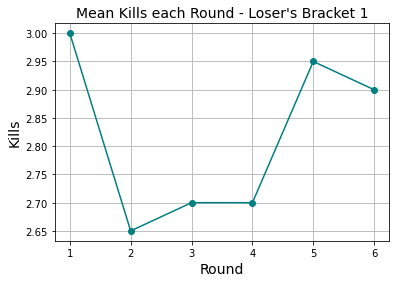

In [67]:
# average kills for loser's bracket 1

y = l1.iloc[:,0:][l1.columns[::2]].mean()

x = [*range(1,7)]
plt.plot(x, y, color='teal', marker='o')
plt.title('Mean Kills each Round - Loser\'s Bracket 1', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('MeanKills.png', bbox_inches='tight')
plt.show()

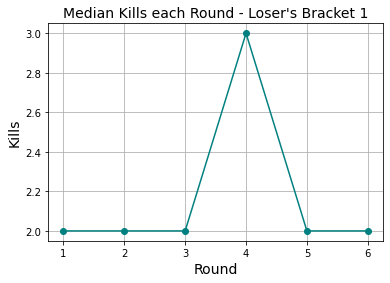

In [68]:
# median kills for loser's bracket 1

y = l1.iloc[:,0:][l1.columns[::2]].median()

x = [*range(1,7)]
plt.plot(x, y, color='teal', marker='o')
plt.title('Median Kills each Round - Loser\'s Bracket 1', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('MeanKills.png', bbox_inches='tight')
plt.show()

### Max / Average / Median for Winner's Bracket

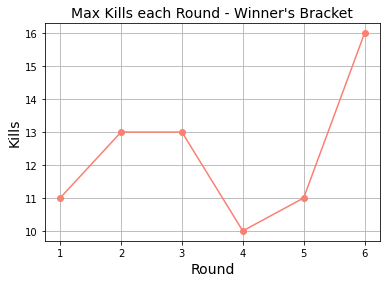

In [69]:
# max kills for winner's bracket

w1max = w1.iloc[:,0:][w1.columns[::2]].max()
y = w1max[1:]

x = [*range(1,7)]
plt.plot(x, y, color='salmon', marker='o')
plt.title('Max Kills each Round - Winner\'s Bracket', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()

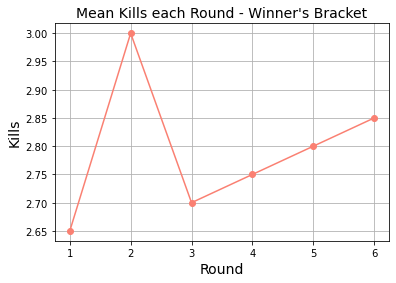

In [70]:
# average kills for winner's bracket

y = w1.iloc[:,0:][w1.columns[::2]].mean()

x = [*range(1,7)]
plt.plot(x, y, color='salmon', marker='o')
plt.title('Mean Kills each Round - Winner\'s Bracket', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('MeanKills.png', bbox_inches='tight')
plt.show()

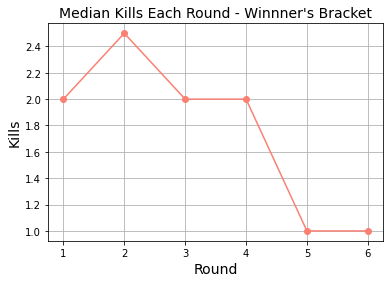

In [71]:
# median kills for Winner's Bracket

y = w1.iloc[:,0:][w1.columns[::2]].median()

x = [*range(1,7)]
plt.plot(x, y, color='salmon', marker='o')
plt.title('Median Kills Each Round - Winnner\'s Bracket', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('MeanKills.png', bbox_inches='tight')
plt.show()

### Max / Average / Median for Loser's Bracket 2

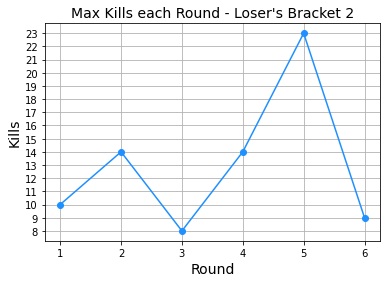

In [72]:
# max kills for loser's bracket 2

l2max = l2.iloc[:,0:][l2.columns[::2]].max()
y = l2max[1:]

x = [*range(1,7)]
plt.plot(x, y, color='dodgerblue', marker='o')
plt.title('Max Kills each Round - Loser\'s Bracket 2', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()

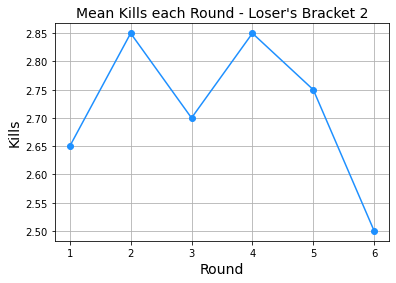

In [73]:
# average kills for loser's bracket 2

y = l2.iloc[:,0:][l2.columns[::2]].mean()

x = [*range(1,7)]
plt.plot(x, y, color='dodgerblue', marker='o')
plt.title('Mean Kills each Round - Loser\'s Bracket 2', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

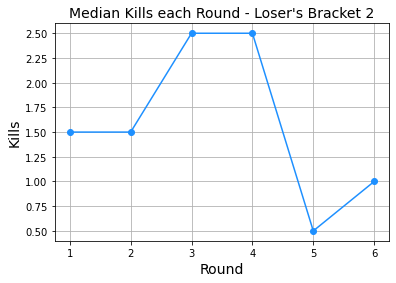

In [74]:
# median kills for loser's bracket 2

y = l2.iloc[:,0:][l2.columns[::2]].median()

x = [*range(1,7)]
plt.plot(x, y, color='dodgerblue', marker='o')
plt.title('Median Kills each Round - Loser\'s Bracket 2', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

### Create Finals Table for the database

In [146]:
c.execute('''
          CREATE TABLE Finals ('Team' TEXT PRIMARY KEY,'Total' INT, '1' INT, 
          'A' INT, '2' INT, 'B' INT, '3' INT, C INT, 
          '4' INT, 'D' INT, '5' INT, 'E' INT, '6' INT, F INT,
          '7' INT, G INT, '8' INT, H INT)
          ''')
conn.commit()

In [147]:
f = pd.read_csv('csv/finals.csv', low_memory=False)
f.to_sql('Finals',conn,if_exists='replace',index=False)
conn.commit()

In [148]:
f = f.drop('Total', axis=1)

### Max, Mean, Median for Finals stage

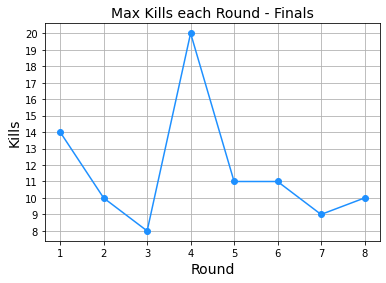

In [122]:
# max kills for Finals

fmax = f.iloc[:,0:][f.columns[::2]].max()
y = fmax[1:]

x = [*range(1,9)]
plt.plot(x, y, color='dodgerblue', marker='o')
plt.title('Max Kills each Round - Finals', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()

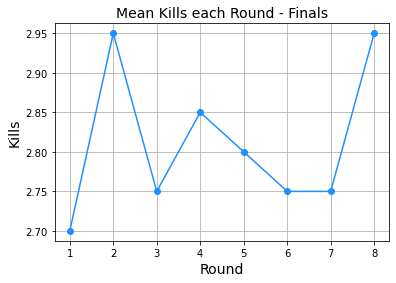

In [123]:
# average kills for Finals

y = f.iloc[:,0:][f.columns[::2]].mean()

x = [*range(1,9)]
plt.plot(x, y, color='dodgerblue', marker='o')
plt.title('Mean Kills each Round - Finals', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

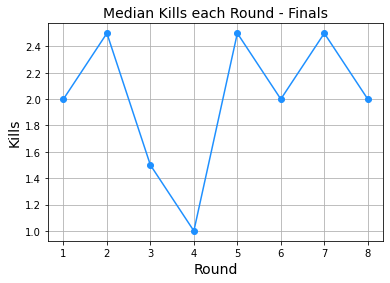

In [124]:
# median kills for Finals

y = f.iloc[:,0:][f.columns[::2]].median()

x = [*range(1,9)]
plt.plot(x, y, color='dodgerblue', marker='o')
plt.title('Median Kills each Round - Finals', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

### Clean up Database

In [165]:
c.execute('''UPDATE GroupGame1 SET Team=REPLACE(Team, '\xa0', '') WHERE Team LIKE '\xa0%';''')
c.execute('''UPDATE GroupGame2 SET Team=REPLACE(Team, '\xa0', '') WHERE Team LIKE '\xa0%';''')
c.execute('''UPDATE GroupGame3 SET Team=REPLACE(Team, '\xa0', '') WHERE Team LIKE '\xa0%';''')
c.execute('''UPDATE LosersBracket1 SET Team=REPLACE(Team, '\xa0', '') WHERE Team LIKE '\xa0%';''')
c.execute('''UPDATE WinnersBracket SET Team=REPLACE(Team, '\xa0', '') WHERE Team LIKE '\xa0%';''')
c.execute('''UPDATE LosersBracket2 SET Team=REPLACE(Team, '\xa0', '') WHERE Team LIKE '\xa0%';''')
c.execute('''UPDATE Finals SET Team=REPLACE(Team, '\xa0', '') WHERE Team LIKE '\xa0%';''')

### Perform SQL queries to the Database, retrieve performances over group stage and bracket stage of the top 4 winners

In [149]:
c.execute('''
          SELECT f.Team, g1.Total, g1.row_num, g2.Total, g2.row_num,
          g3.Total, g3.row_num, w.Total, w.row_num, f.Total, f.row_num
          FROM(      
              SELECT Total, Team, ROW_NUMBER() OVER (ORDER BY Total DESC) as row_num
              FROM GroupGame1) g1
          INNER JOIN 
              (SELECT Total, Team, ROW_NUMBER() OVER (ORDER BY Total DESC) as row_num
              FROM GroupGame2) g2
              ON g1.Team = g2.Team 
          INNER JOIN 
              (SELECT Total, Team, ROW_NUMBER() OVER (ORDER BY Total DESC) as row_num
              FROM GroupGame3) g3
              ON g2.Team = g3.Team
          INNER JOIN 
              (SELECT Total, Team, ROW_NUMBER() OVER (ORDER BY Total DESC) as row_num
              FROM WinnersBracket) w
              ON g3.Team = w.Team
          INNER JOIN 
              (SELECT Total, Team, ROW_NUMBER() OVER (ORDER BY Total DESC) as row_num
              FROM Finals) f
              ON w.Team = f.Team 
          WHERE g1.Team IN (SELECT Team FROM Finals LIMIT 4)
          ''')
df = pd.DataFrame(c.fetchall(), columns = ['Team', 
                                        'GroupGame1_Points', 'GroupGame1_Rank',
                                        'GroupGame2_Points', 'GroupGame2_Rank',
                                        'GroupGame3_Points', 'GroupGame3_Rank',
                                        'WinnersBracket_Points', 'WinnersBracket_Rank',
                                        'Finals_Points', 'Finals_Rank'])
df

,Team,GroupGame1_Points,GroupGame1_Rank,GroupGame2_Points,GroupGame2_Rank,GroupGame3_Points,GroupGame3_Rank,WinnersBracket_Points,WinnersBracket_Rank,Finals_Points,Finals_Rank
0,XSET,72,1,34,16,30,24,39,7,66,4
1,NRG,45,10,49,8,53,3,60,1,86,1
2,TSM,38,15,54,4,61,2,39,8,79,2
3,ACE,18,32,72,1,37,19,48,2,78,3


### Retrieve data from database and dataframe and perform dataframe join on them

In [151]:
conn = sqlite3.connect('ApexLegendGlobalSeries.db') 
c = conn.cursor()
c.execute('''
          SELECT g1.Team, g1.Total, g2.Total, g3.Total
          FROM(      
              SELECT Total, Team, ROW_NUMBER() OVER (ORDER BY Total DESC) as row_num
              FROM GroupGame1) g1
          INNER JOIN 
              (SELECT Total, Team, ROW_NUMBER() OVER (ORDER BY Total DESC) as row_num
              FROM GroupGame2) g2
              ON g1.Team = g2.Team 
          INNER JOIN 
              (SELECT Total, Team, ROW_NUMBER() OVER (ORDER BY Total DESC) as row_num
              FROM GroupGame3) g3
              ON g2.Team = g3.Team
          ''')
pdf = pd.DataFrame(c.fetchall(), columns = ['Team', 
                                        'GroupGame1_Points', 
                                        'GroupGame2_Points', 
                                        'GroupGame3_Points'])

pdf['Total_Points'] = pdf.sum(axis=1)
pdf = pdf.drop(['GroupGame1_Points','GroupGame2_Points','GroupGame3_Points'], axis=1)
pdf.head()

,Team,Total_Points
0,XSET,136
1,JLE,133
2,FNC,129
3,EXO,147
4,CR,86


### Answer some questions:
### Does higher total kills equivalent to higher rank?

In [152]:
d = {'Team': g1.iloc[:,0], 'Total_Kills': g1.iloc[:,0:][g1.columns[::2]].sum(axis = 1)}
groupdf = pd.DataFrame(d, columns = ['Team', 'Total_Kills'])
groupdf = pd.merge(groupdf, pdf, on='Team', how='outer')
groupdf = groupdf.sort_values(by=['Total_Points'], ascending=False).reset_index().drop(['Team'],axis=1)
groupdf['index'] = range(1,41)
groupdf.rename(columns = {'index':'Rank'}, inplace = True)
groupdf.head()

,Rank,Total_Kills,Total_Points
0,1,87,153
1,2,79,152
2,3,75,147
3,4,79,147
4,5,80,136


### Visualize Total Kills vs Total Points vs Rank

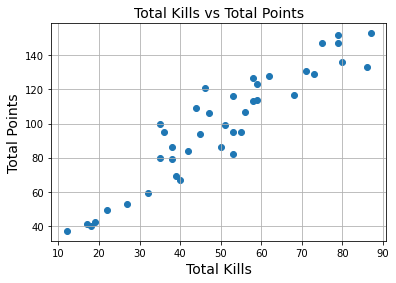

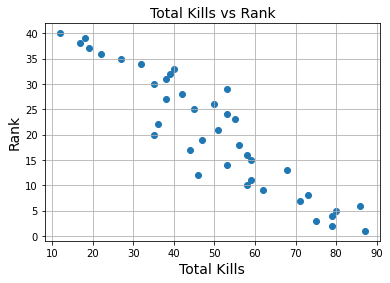

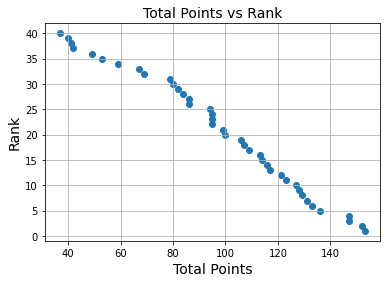

In [118]:
plt.title('Total Kills vs Total Points', fontsize=14)
plt.xlabel('Total Kills', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.grid(True)
plt.scatter(groupdf['Total_Kills'], groupdf['Total_Points'] )
plt.show()

plt.title('Total Kills vs Rank', fontsize=14)
plt.xlabel('Total Kills', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.grid(True)
plt.scatter(groupdf['Total_Kills'], groupdf['Rank'] )
plt.show()

plt.title('Total Points vs Rank', fontsize=14)
plt.xlabel('Total Points', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.grid(True)
plt.scatter(groupdf['Total_Points'], groupdf['Rank'] )
plt.show()

### Visualize Top 4 Winners Performance over the Tournament Stages

 XSET


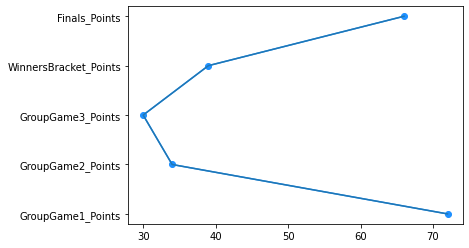

 NRG


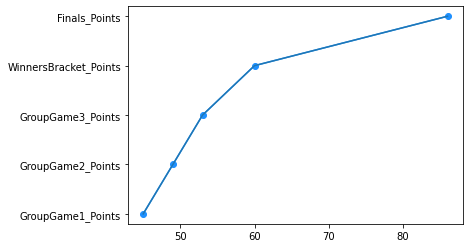

 TSM


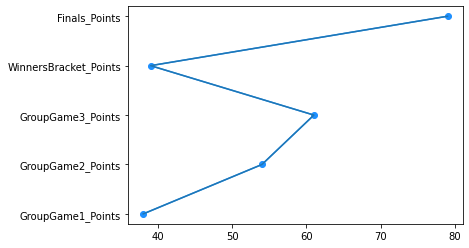

 ACE


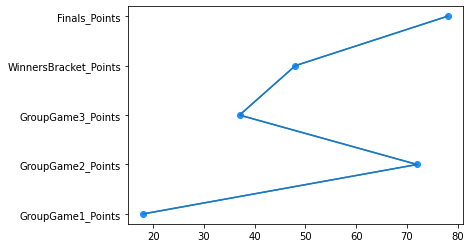

In [153]:
winnersdf = df.iloc[:,0:][df.columns[1::2]]
i=0
for z in df['Team']:
    print(z)
    y = winnersdf.columns
    x = winnersdf.iloc[i,0:]
    i=i+1
    plt.plot(x, y, color='dodgerblue', marker='o')
    plt.plot(x, y, label = z)
    plt.show()

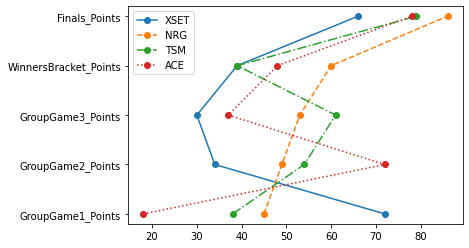

In [154]:
winnersdf = df.iloc[:,0:][df.columns[1::2]]

x,x1,x2,x3 = winnersdf.iloc[0,0:], winnersdf.iloc[1,0:], winnersdf.iloc[2,0:], winnersdf.iloc[3,0:]
y = winnersdf.columns


plt.plot(x, y, label = "XSET", linestyle="-", marker='o')
plt.plot(x1, y, label = "NRG", linestyle="--", marker='o')
plt.plot(x2, y, label = "TSM", linestyle="-.", marker='o')
plt.plot(x3, y, label = "ACE", linestyle=":", marker='o')
plt.legend()
plt.show()